In [268]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline
from datetime import datetime

In [188]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\gui prj\BTC-USD.csv', index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-02,36699.921875,38231.339844,35966.308594,37575.179688,37575.179688,3.307087e+10
2021-06-03,37599.410156,39478.953125,37243.972656,39208.765625,39208.765625,3.546075e+10
2021-06-04,39242.484375,39242.484375,35717.722656,36894.406250,36894.406250,4.183109e+10
2021-06-05,36880.156250,37917.714844,34900.414063,35551.957031,35551.957031,3.595947e+10
2021-06-06,35538.609375,36436.421875,35304.578125,35862.378906,35862.378906,2.891344e+10


In [189]:
df.index

Index(['2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05', '2021-06-06',
       '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
       ...
       '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28',
       '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02'],
      dtype='object', name='Date', length=366)

In [191]:
# convert  the index into datetime 
df.index = pd.to_datetime(df.index)

In [192]:
df.index

DatetimeIndex(['2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05',
               '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11',
               ...
               '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27',
               '2022-05-28', '2022-05-29', '2022-05-30', '2022-05-31',
               '2022-06-01', '2022-06-02'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-06-02 to 2022-06-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       365 non-null    float64
 1   High       365 non-null    float64
 2   Low        365 non-null    float64
 3   Close      365 non-null    float64
 4   Adj Close  365 non-null    float64
 5   Volume     365 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [193]:
# the average values for each year
df.resample(rule='A').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,47122.225985,48308.807906,45827.724793,47148.882556,47148.882556,3.405784e+10
2022-12-31,39388.419498,40185.007170,38433.790759,39296.634830,39296.634830,2.894321e+10


In [123]:
# we can also apply a function we define over resample
def first_entry(entry):
    # check if there is no null value:
    if len(entry):
        # return first entry
        return entry[0]

In [194]:
# Important caution: the date index are not correct as the function and the resample rule are not consistent
df.resample(rule='B').apply(first_entry).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-02,36699.921875,38231.339844,35966.308594,37575.179688,37575.179688,3.307087e+10
2021-06-03,37599.410156,39478.953125,37243.972656,39208.765625,39208.765625,3.546075e+10
2021-06-04,39242.484375,39242.484375,35717.722656,36894.406250,36894.406250,4.183109e+10
2021-06-07,35835.265625,36790.570313,33480.640625,33560.707031,33560.707031,3.368394e+10
2021-06-08,33589.519531,34017.386719,31114.443359,33472.632813,33472.632813,4.990205e+10


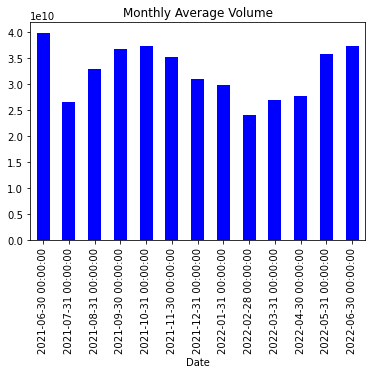

In [200]:
# monthly average volume
df.Volume.resample(rule='M').mean().plot.bar(title='Monthly Average Volume', color='b');

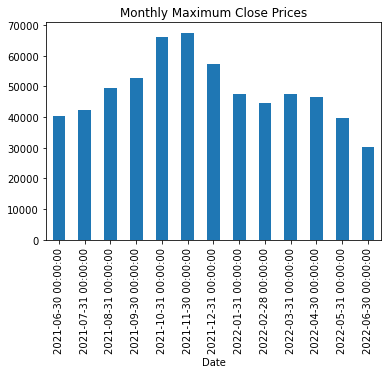

In [198]:
df.Close.resample(rule='M').max().plot.bar(title='Monthly Maximum Close Prices');

In [201]:
# shift every row one month forward. Note that when we specify freq, only the index values are changed accordingly, the 
# entries aren't affected
df.shift(periods=1, freq='M').head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-30,36699.921875,38231.339844,35966.308594,37575.179688,37575.179688,3.307087e+10
2021-06-30,37599.410156,39478.953125,37243.972656,39208.765625,39208.765625,3.546075e+10
2021-06-30,39242.484375,39242.484375,35717.722656,36894.406250,36894.406250,4.183109e+10
2021-06-30,36880.156250,37917.714844,34900.414063,35551.957031,35551.957031,3.595947e+10
2021-06-30,35538.609375,36436.421875,35304.578125,35862.378906,35862.378906,2.891344e+10


Moving Average

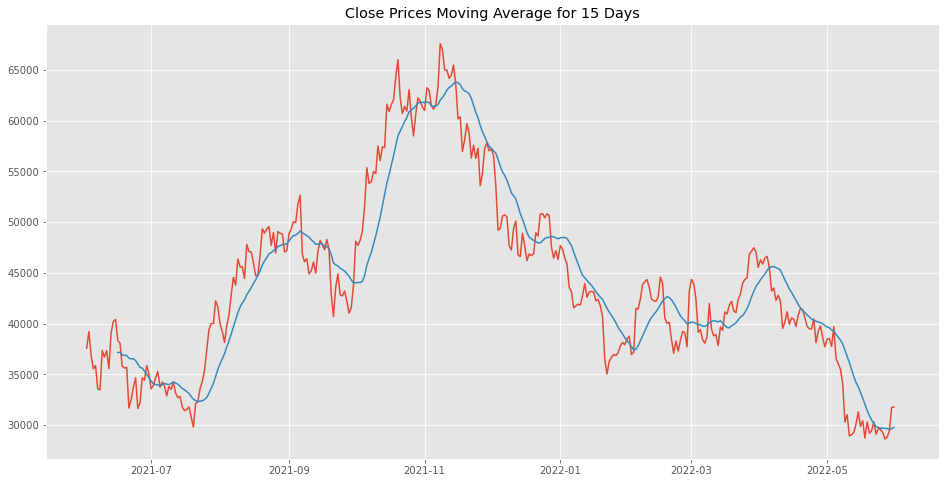

In [221]:
# plot the moving average of close prices for 15 days
close_rolling = df.Close.rolling(window=15).mean()

plt.figure(figsize=(16,8))
plt.style.use('ggplot')
plt.title('Close Prices Moving Average for 15 Days')

ax = plt.gca()
ax.plot(df.index, df.Close)

plt.plot(close_rolling);

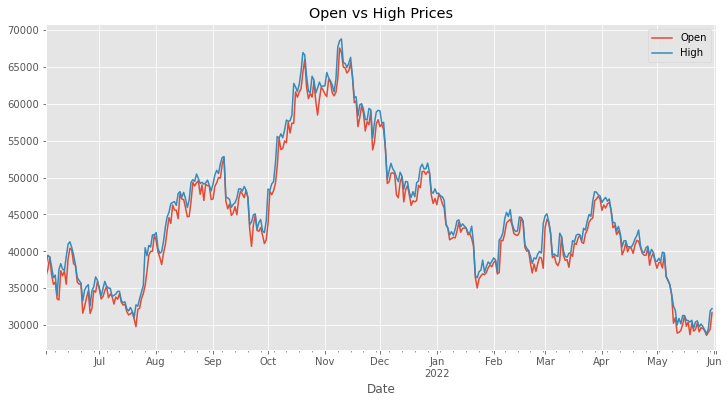

In [243]:
df[['Open', 'High']].plot(figsize=(12,6), title='Open vs High Prices');

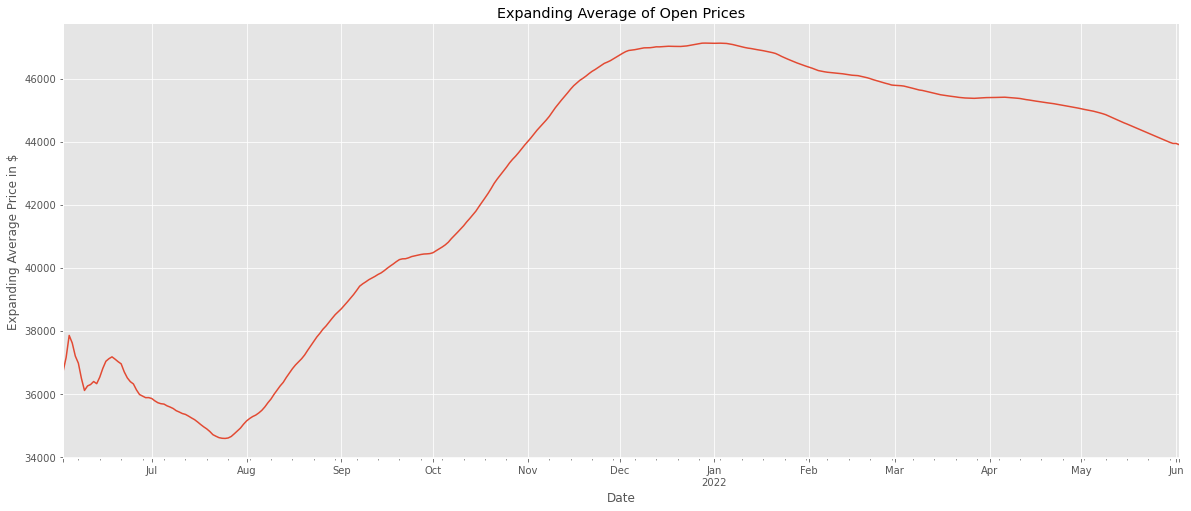

In [240]:
# Expanding average of open prices
ax = df['Open'].expanding().mean().plot(figsize=(20,8), title='Expanding Average of Open Prices')
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Expanding Average Price in $');

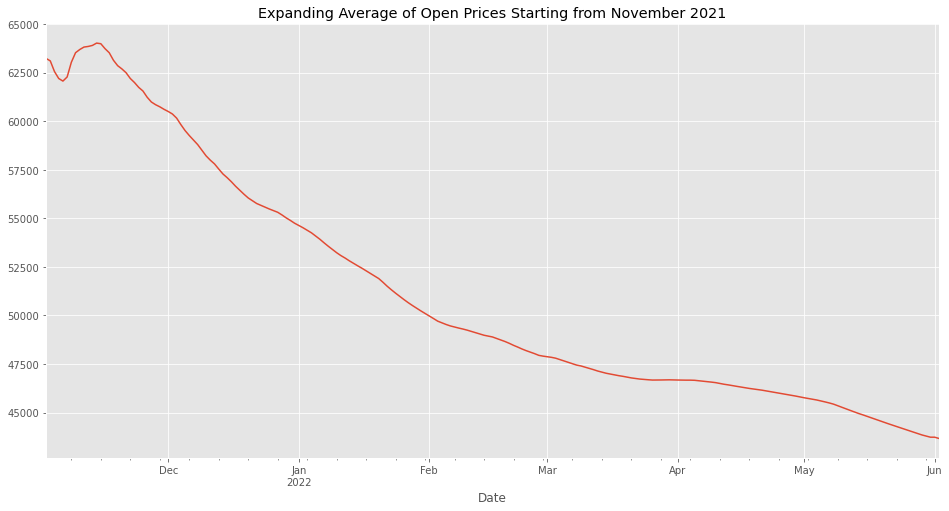

In [278]:
import matplotlib.dates as mdates
ax = df.Close[df.index > '2021-11'].expanding().mean().plot(figsize=(16,8), title='Expanding Average of Open Prices Starting from November 2021');
ax.xaxis.set_major_locator(mdates.MonthLocator())